In [1]:
%matplotlib widget
from main import *
import sympy as sp
from sympy import Heaviside, sin, cos
sp.init_printing()

In [2]:
Vcc = 5

var = sp.Symbol("Vin", real=True)

In [3]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    VoltageSource("Vg", {"V+" : "V1", "V-" : Gnd}, V_t = 5 * Heaviside(t-1)),
                    Diode("D1", {"Vp" : "V1", "Vn" : "V2"}),
                    Resistor("R1", {"V1" : "V2", "V2" : "Vc"}, R = 1e3),
                    Resistor("R2", {"V1" : "Vc", "V2" : Gnd}, R = 1e6),
                    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, V0 = 3.5, C = 1e-5),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*Heaviside(t - 1)}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 'Vc'}, 'values': {'R': 1000.0}},
 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'R': 1000000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-05, 'V0': 3.5}}}

In [4]:
Solver.setMain("acTest")
compiled = Solver.compile()

In [5]:
model = solveLaplace(compiled, 4, 0.1, debugLog = True)

{I3_0, I3_1, I1_0, V1, I0_1, V2, V0, I1_1, I2_1, I4_0, I0_0, I4_1, I2_0}
[Eq(I1_1 + I2_0, 0), Eq(I0_0 + I1_0, 0), Eq(I2_1 + I3_0 + I4_0, 0)]
{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*Heaviside(t - 1)}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}}, 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 'Vc'}, 'values': {'R': 1000.0}}, 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'R': 1000000.0}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-05, 'V0': 3.5}}}
{'Vg': {'V+': V1, 'V-': 0}, 'D1': {'Vp': V1, 'Vn': V0}, 'R1': {'V1': V0, 'V2': V2}, 'R2': {'V1': V2, 'V2': 0}, 'C1': {'V1': V2, 'V2': 0}}
{'Vg': {'V+': I0_0, 'V-': I0_1}, 'D1': {'Vp': I1_0, 'Vn': I1_1}, 'R1': {'V1': I2_0, 'V2': I2_1}, 'R2': {'V1': I3_0, 'V2': I3_1}, 'C1': {'V1': I4_0, 'V2': I4_1}}


In [6]:
print(compiled["nodes"])

Vin = compiled["voltages"]["Vg"]["V+"]
Id = compiled["currents"]["D1"]["Vp"]
Vd = compiled["voltages"]["D1"]["Vp"] - compiled["voltages"]["D1"]["Vn"]
Vc = compiled["nodes"]["Vc"]
Iout = compiled["currents"]["R2"]["V1"]

{'V2': V0, 'V1': V1, 'Vc': V2}


In [7]:
printModel(model, var=t, important={Id})
printModel(model, var=t, important={Iout})

{('R1', ''), ('C1', ''), ('D1', 'Cut'), ('Vg', ''), ('R2', '')}
t ∈ Interval.Ropen(0, 1.00002441406250)
{I1_0: 0}
{I1_0: 0}
{I1_0: 0}
-------------------------------------
{('D1', 'Fwd'), ('R1', ''), ('C1', ''), ('Vg', ''), ('R2', '')}
t ∈ Interval(1.00002441406250, 4.00002441406250)
{I1_0: 4.3956043956044e-6 + 0.00122868116423415*exp(-100.1*t)}
{I1_0: 4.39560439560440e-6}
{I1_0: 4.39560439560440e-6}
-------------------------------------
{('R1', ''), ('C1', ''), ('D1', 'Cut'), ('Vg', ''), ('R2', '')}
t ∈ Interval.Ropen(0, 1.00002441406250)
{I3_0: 3.5e-6*exp(-t/10)}
{I3_0: 3.50000000000000e-6}
{I3_0: 3.16692323137025e-6}
-------------------------------------
{('D1', 'Fwd'), ('R1', ''), ('C1', ''), ('Vg', ''), ('R2', '')}
t ∈ Interval(1.00002441406250, 4.00002441406250)
{I3_0: 4.3956043956044e-6 - 1.22868116423415e-6*exp(-100.1*t)}
{I3_0: 4.39560439560440e-6}
{I3_0: 4.39560439560440e-6}
-------------------------------------


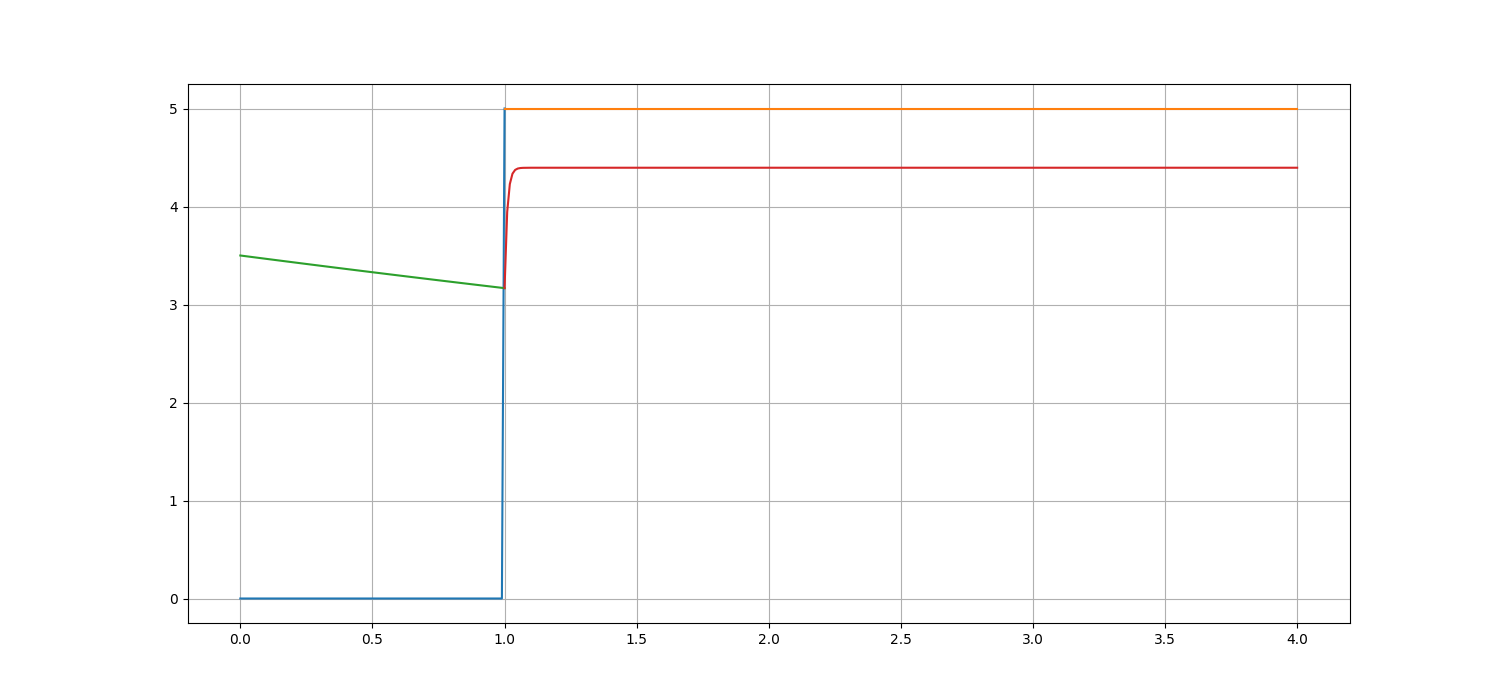

In [8]:
measurments =   [   
                    (Vin, "Vin(t)"),
                    (Vc, "Vc(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

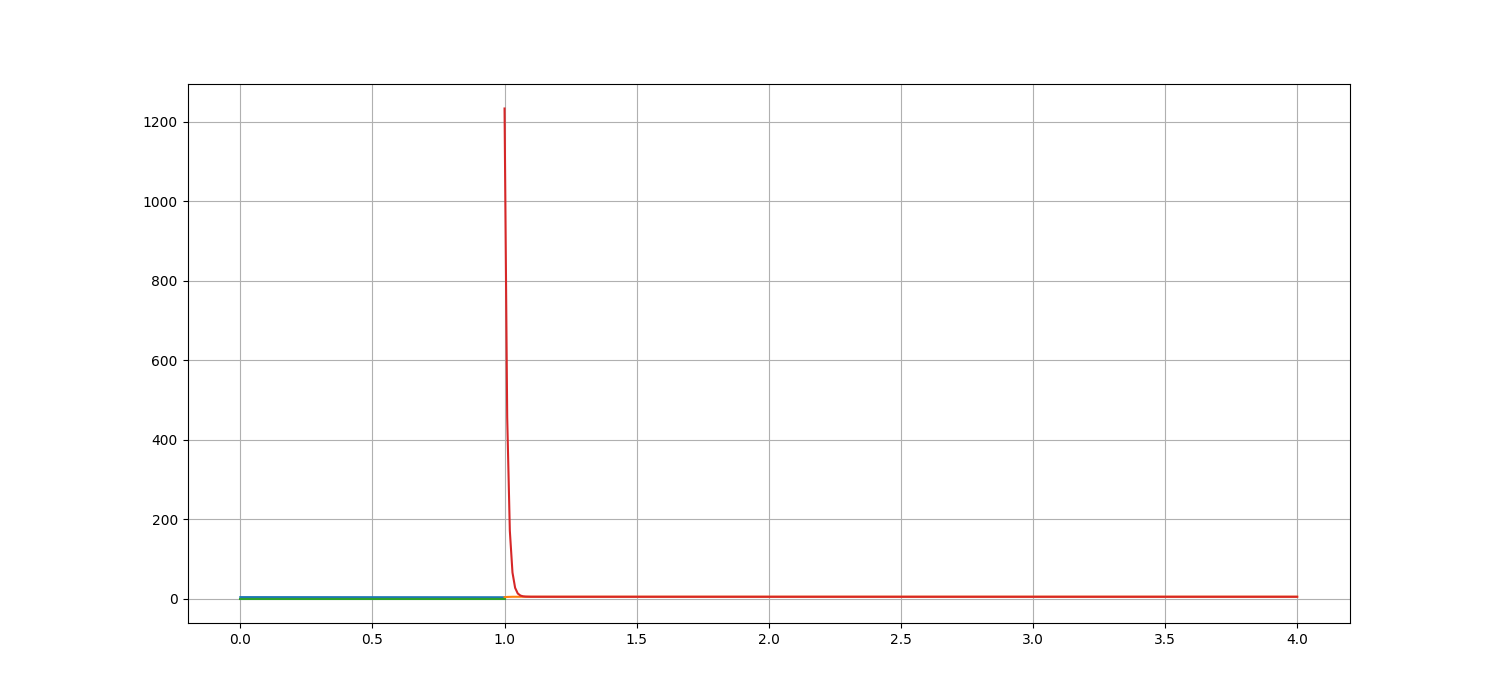

In [9]:
measurments =   [   
                    (1e6 * Iout, "Iout(t)"),
                    (1e6 * Id, "Id(t)"),
                    #(Vd, "Vd(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()